# 05. SGDRegress

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor 
from sklearn.datasets import load_boston, load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import fetch_california_housing
import pandas as pd
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
carDF = pd.read_csv('data/cars.csv')
carDF.columns = ['speed', 'dist']
carDF

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16
5,9,10
6,10,18
7,10,26
8,10,34
9,11,17


In [3]:
x_data = carDF[['speed']]
y_data = carDF[['dist']]

In [4]:
# max_iter = 1000   (학습횟수)
# alpha = 0.001    (런닝메이트)
# early_stopping = True (코스트값이 변화가 없으면 학습 종료)
modelSGD = SGDRegressor(max_iter = 200, alpha = 0.001, early_stopping = True, verbose = 1)
modelSGD.fit(x_data, y_data)

-- Epoch 1
Norm: 3.52, NNZs: 1, Bias: 0.216382, T: 45, Avg. loss: 730.083616
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.86, NNZs: 1, Bias: -0.173164, T: 90, Avg. loss: 284.170950
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 2.56, NNZs: 1, Bias: -0.313350, T: 135, Avg. loss: 237.284353
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 2.94, NNZs: 1, Bias: -0.663154, T: 180, Avg. loss: 257.136655
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 3.37, NNZs: 1, Bias: -0.934379, T: 225, Avg. loss: 278.390129
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 2.75, NNZs: 1, Bias: -1.193187, T: 270, Avg. loss: 180.134158
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 2.32, NNZs: 1, Bias: -1.369581, T: 315, Avg. loss: 160.884615
Total training time: 0.01 seconds.
Convergence after 7 epochs took 0.01 seconds


C:\Users\medici\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SGDRegressor(alpha=0.001, early_stopping=True, max_iter=200, verbose=1)

In [5]:
modelSGD.coef_

array([2.31715131])

In [6]:
modelSGD.intercept_

array([-1.36958108])

# 06. 결정계수

r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계,

r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계,

r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계,

r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계,

r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계,

r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계,

r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계

In [7]:
from sklearn.metrics import r2_score
carDF = pd.read_csv('data/cars.csv')
carDF.columns = ['speed', 'dist']
carDF

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16
5,9,10
6,10,18
7,10,26
8,10,34
9,11,17


In [8]:
x_data = carDF[['speed']]
y_data = carDF['dist']

In [9]:
modelCar = LinearRegression()
modelCar.fit(x_data, y_data)

LinearRegression()

In [10]:
modelCar.coef_

array([3.93240876])

In [11]:
modelCar.intercept_

-17.57909489051095

In [12]:
carDF.corr()

,speed,dist
speed,1.000000,0.806895
dist,0.806895,1.000000


* 회귀모델의 검증을 위한 또 다른 측정 지표 중 하나로 결정 계수(coefficient of determination, $R^2$) 사용


$ SSR( 예측값- 평균값)^2 의합$ <br>
$ SST( 실제값- 평균값)^2 의합$ <br>
$ SSE( 실제값- 예측값)^2 의합$ <br>
$ R^2 = \frac{SSR}{SST} = 1-\frac{SSE}{SST}   $


결정 계수 (Coefficient of determination, <br>
R 제곱 (R^2, R-squared, 피어슨 상관 계수의 제곱))<br>
 1 - (오차의 제곱합)/(편차의 제곱합)<br>
오차는 실제 값과 예측 값의 차이<br>
편차는 실제 값과 평균 값의 차이<br>
0 <= 결정 계수 <= 1 (0이면 0점, 1이면 100점)<br>
높을 수록 좋음<br>

from sklearn.metrics import r2_score<br>
y_predict = model.predict( x_data )<br>
r2_score( y_data, y_predict )<br>

In [13]:
y_predict = modelCar.predict(x_data)
r2_score(y_data, y_predict)

0.6510793807582509

# 07. 다중 선형 회귀

# 선형 모델(Linear Models)

* 선형 모델은 과거 부터 지금 까지 널리 사용되고 연구 되고 있는 기계학습 방법
* 선형 모델은 입력 데이터에 대한 선형 함수를 만들어 예측 수행

* 회귀 분석을 위한 선형 모델은 다음과 같이 정의

\begin{equation}

\hat{y}(w,x) = b + w x

\end{equation}

\begin{equation}

\hat{y}(w,x) = b + w_1 x_1 + ... + w_p x_p

\end{equation}

  + $x$: 입력 데이터
  + $w$: 모델이 학습할 파라미터
  + $b$: 편향
  + $w_1$~$w_p$: 가중치

## 선형 회귀(Linear Regression)

* **선형 회귀(Linear Regression)**또는 **최소제곱법(Ordinary Least Squares)**은 가장 간단한 회귀 분석을 위한 선형 모델
* 선형 회귀는 모델의 예측과 정답 사이의 **평균제곱오차(Mean Squared Error)**를 최소화 하는 학습 파라미터 $w$를 찾음
* 평균제곱오차는 아래와 같이 정의

\begin{equation}

MSE = \frac{1}{N} \sum_{i=1}^{N}(y_i - \hat{y}_i)^2

\end{equation}

  + $y$: 정답
  + $\hat{y}$: 예측 값을 의미

* 선형 회귀 모델에서 사용하는 다양한 오류 측정 방법
  + MAE(Mean Absoulte Error)
  + MAPE(Mean Absolute Percentage Error)
  + MSE(Mean Squared Error)
  + MPE(Mean Percentage Error)

In [14]:
df = pd.read_csv('data/data-01.csv', header = None)
df.columns = ['q1', 'q2', 'midterm', 'final']
df

,q1,q2,midterm,final
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142
5,53,46,55,101
6,69,74,77,149
7,47,56,60,115
8,87,79,90,175
9,79,70,88,164


In [15]:
x_data = df[['q1', 'q2', 'midterm']]
y_data = df[['final']]

In [16]:
model_lr = LinearRegression()

In [17]:
model_lr.fit(x_data, y_data)

LinearRegression()

In [18]:
model_lr.coef_

array([[0.35593822, 0.54251876, 1.16744422]])

In [19]:
model_lr.intercept_

array([-4.3361024])

In [20]:
# q1 : 70점, q2 : 75점, midterm : 75점 인 경우 예측값
# w1 * x1 + w2 * x2 + w3 * x3 + b
70 * 0.35593822 + 75 * 0.54251876 + 75 * 1.16744422 + (-4.3361024)

148.8267965

In [21]:
model_lr.predict([[70, 75, 75]])

array([[148.82679595]])

In [22]:
model_lr.predict([[70, 75, 75], [60, 45, 50]])

array([[148.82679595],
       [ 99.80574563]])

In [23]:
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6], [7, 8]])
np.matmul(a, b)

array([[19, 22],
       [43, 50]])

In [24]:
x_data.shape

(25, 3)

In [25]:
p = model_lr.predict(x_data)    # 25x3 3x1 => 25x1
p

array([[152.60720439],
       [185.08011472],
       [181.78158547],
       [199.74522647],
       [139.1747207 ],
       [103.69391793],
       [150.2632274 ],
       [112.82069728],
       [174.55948394],
       [164.49442094],
       [143.42337551],
       [142.23416416],
       [186.54285759],
       [152.40794527],
       [151.24409108],
       [189.12496613],
       [143.50219218],
       [181.89389361],
       [177.29838914],
       [158.34934019],
       [176.57742415],
       [174.66365778],
       [167.68889392],
       [150.63279846],
       [191.1954116 ]])

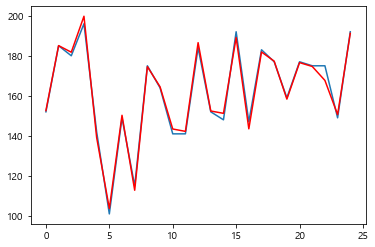

In [26]:
plt.plot(y_data)
plt.plot(p, 'r')
plt.show()

In [27]:
from sklearn.datasets import load_boston, load_iris

In [3]:
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [29]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [30]:
boston['data']

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [31]:
boston['target']

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

### 보스턴 주택 가격 데이터

* 주택 가격 데이터는 도시에 대한 분석과 부동산, 경제적인 정보 분석 등 많은 활용 가능한 측면들이 존재
* 보스턴 주택 가격 데이터는 카네기 멜론 대학교에서 관리하는 StatLib 라이브러리에서 가져온 것
* 헤리슨(Harrison, D.)과 루빈펠트(Rubinfeld, D. L.)의 논문 "Hedonic prices and the demand for clean air', J. Environ. Economics & Management"에서 보스턴 데이터가 사용
* 1970년도 인구 조사에서 보스턴의 506개 조사 구역과 주택 가격에 영향을 주는 속성 21개로 구성

| 속성 | 설명 |
|------|------|
| CRIM | 자치시(town)별 1인당 범죄율 |
| ZN | 25,000 평방 피트가 넘는 거주지역 토지 비율 |
| INDUS | 자치시(town)별 비소매 상업지역 토지 비율 |
| CHAS | 찰스 강(Charles River)에 대한 변수 (강의 경계에 위치하면 1, 그렇지 않으면 0) |
| NOX | 10,000,000당  일산화질소 농도 |
| RM | 주택 1가구당 평균 방의 수 |
| AGE | 1940년 이전에 건축된 소유주택 비율 |
| DIS | 5개의 보스턴 고용 센터까지의 가중 거리 |
| RAD | 방사형 고속도로 접근성 지수 |
| TAX | 10,000 달러당 재산 세율 |
| PTRATIO | 자치시(town)별 학생/교사 비율 |
| B | 1000(Bk-0.63)^2, Bk: 자치시별 흑인 비율 |
| LSTAT | 모집단의 하위계층 비율(%) |
| MEDV | 소유자가 거주하는 주택가격(중앙값) (단위: 1,000 달러) |


In [32]:
boston['data'].shape

(506, 13)

In [4]:
boston_df = pd.DataFrame(boston['data'], columns = boston['feature_names'])
boston_df['MEDV'] = boston['target']
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [5]:
x_data = boston_df.drop('MEDV', axis=1)
y_data = boston_df[['MEDV']]

In [6]:
x_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [7]:
y_data

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [8]:
boston_lr = LinearRegression()
boston_lr.fit(x_data, y_data)

LinearRegression()

In [9]:
boston_lr.predict([[0.02731, 0.0, 7.07, 0.0, 0.469, 6.421, 78.9, 4.9671, 2.0, 242.0, 17.8, 396.90, 9.14]])

array([[25.02556238]])

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [10]:
# 결론 : 다중(scale)
scaleX = StandardScaler()   # numpy(ndarray) matrix
x_dataS = scaleX.fit_transform(x_data.values)

In [12]:
x_data.values

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [11]:
x_dataS

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [42]:
y_data

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [43]:
result = train_test_split(x_dataS, y_data.values, test_size = 0.2, random_state = 1)

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x_dataS, y_data.values, test_size = 0.2, random_state = 1)

In [45]:
x_dataS.shape

(506, 13)

In [46]:
x_train.shape

(404, 13)

In [47]:
x_test.shape

(102, 13)

In [48]:
y_data.shape

(506, 1)

In [49]:
y_train.shape

(404, 1)

In [50]:
y_test.shape

(102, 1)

In [51]:
modelSGD = SGDRegressor(verbose=1)
modelSGD.fit(x_train, y_train)

-- Epoch 1
Norm: 3.67, NNZs: 13, Bias: 15.824858, T: 404, Avg. loss: 101.125208
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 4.61, NNZs: 13, Bias: 19.625441, T: 808, Avg. loss: 24.392809
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 4.95, NNZs: 13, Bias: 21.175384, T: 1212, Avg. loss: 14.735009
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 5.27, NNZs: 13, Bias: 21.851207, T: 1616, Avg. loss: 12.654392
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 5.48, NNZs: 13, Bias: 22.211989, T: 2020, Avg. loss: 11.979894
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 5.61, NNZs: 13, Bias: 22.398463, T: 2424, Avg. loss: 11.786419
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 5.71, NNZs: 13, Bias: 22.489809, T: 2828, Avg. loss: 11.650111
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 5.84, NNZs: 13, Bias: 22.539060, T: 3232, Avg. loss: 11.563541
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 5.83, NNZs: 13, Bias: 22.591243, T: 3636, Avg. loss: 11.362360
T

C:\Users\medici\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SGDRegressor(verbose=1)

In [52]:
modelSGD.score(x_train, y_train)

0.728257999620273

In [53]:
modelSGD.score(x_test, y_test)

0.7624073662393245

In [54]:
modelSGD.predict([x_test[0]])

array([31.95621199])

In [55]:
x_test[0]

array([-0.41477789,  0.92862338, -1.30687771, -0.27259857, -0.71434722,
        0.80402837,  0.0613455 , -0.29108882, -0.29308074, -1.10611514,
       -0.02567665,  0.44105193, -0.71811916])

In [56]:
y_test[0]

array([28.2])

In [57]:
# 원래 값 21.6
boston_lr.predict([[0.02731, 0.0, 7.07, 0.0, 0.469, 6.421, 78.9, 4.9671, 2.0, 242.0, 17.8, 396.90, 9.14]])

array([[25.02556238]])

In [58]:
xd = scaleX.transform([[0.02731, 0.0, 7.07, 0.0, 0.469, 6.421, 78.9, 4.9671, 2.0, 242.0, 17.8, 396.90, 9.14]])

In [59]:
# 원래 값 21.6
modelSGD.predict(xd)

array([24.87824756])

## iris

In [60]:
iris = load_iris()

In [61]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [62]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [63]:
iris_df = pd.DataFrame(iris['data'], columns = iris['feature_names'])
iris_df['target'] = iris['target']
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [64]:
# 문제 - sw : 3.0, pl : 1.4, pw : 0.2일때 sl을 예측하시오
# 1. scale
# 2. train, test
# 3. train, test score
# 4. 예측

### 1. scale

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scale_iris = StandardScaler()
scale_iris_fit = scale_iris.fit_transform(iris_df.values)

### 2. train, test

In [66]:
x_iris = iris_df.drop(['sepal length (cm)','target'], axis = 1)
y_iris = iris_df[['sepal length (cm)']]

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x_iris, y_iris, test_size = 0.2, random_state = 1)

### 3. train, test score

In [68]:
sgd_iris = SGDRegressor()
sgd_iris.fit(x_train, y_train)

C:\Users\medici\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SGDRegressor()

In [69]:
sgd_iris.score(x_train, y_train)

0.7773431198490639

In [70]:
sgd_iris.score(x_test, y_test)

0.8404396616091744

### 4. 예측

In [71]:
xd = scale_iris.fit_transform([[3.0, 1.4, 0.2]])

In [72]:
sgd_iris.predict(xd)

array([0.43916441])

In [76]:
# 1.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

x_iris = iris_df.drop(['sepal length (cm)','target'], axis = 1)
y_iris = iris_df['sepal length (cm)']

scale_iris = StandardScaler()
x_iris = scale_iris.fit_transform(x_iris)

# 2.
x_train, x_test, y_train, y_test = train_test_split(x_iris, y_iris, test_size = 0.2, random_state = 1)

# 3.
sgd_iris = SGDRegressor()
sgd_iris.fit(x_train, y_train)

print(sgd_iris.score(x_train, y_train))
print(sgd_iris.score(x_test, y_test))

# 4.
xd = scale_iris.transform([[3.0, 1.4, 0.2]])
print(sgd_iris.predict(xd))

0.8025467901722353
0.8118566991641085
[4.75713193]


StandardScaler

각 특성의 평균을 0, 분산을 1로 변경하여 모든 특성이 같은 크기를 가지게 한다.

특성의 최솟값과 최댓값 크기를 제한하지 않는다.

StandardScaler 공식 : (x-mean)/std
    

MinMaxScaler

모든 특성이 정확하게 0과 1 사이에 위치하도록 데이터를 변경한다.

MinMaxScaler 공식 : (x−x_min)/(x_max−x_min)

    
RobustScaler

특성들이 같은 스케일을 가지게 한다.

(이러한 특징은 통계적 측면에서는 StandardScaler와 유사하다.)

평균과 분산 대신 median과 quantile을 사용한다.

따라서, outlier의 영향을 받지 않는다.

RobustScaler 공식 : (x−q2)/(q3−q1)


# 09. 다중선형(pipeline_다중공선성)

In [88]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import make_pipeline

In [110]:
boston_df = pd.DataFrame(  boston['data'],columns=boston['feature_names'])
boston_df['MEDV'] =boston.target
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [111]:
x_data = boston_df.iloc[:,:-1]
y_data = boston_df.iloc[:,-1]

In [112]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, 
                                test_size=0.2,random_state=1)

In [113]:
model = make_pipeline(StandardScaler(), SGDRegressor())     # StandardScaler() 한 후, SGDRegressor() 진행한다 (순서 중요)
model.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [114]:
model.score(x_train, y_train)

0.7275475024630219

In [115]:
model.score(x_test, y_test)

0.7600295432032014

In [116]:
[x_test.values[0]]

[array([4.9320e-02, 3.3000e+01, 2.1800e+00, 0.0000e+00, 4.7200e-01,
        6.8490e+00, 7.0300e+01, 3.1827e+00, 7.0000e+00, 2.2200e+02,
        1.8400e+01, 3.9690e+02, 7.5300e+00])]

In [117]:
model.predict([x_test.values[0]])

array([31.81871524])

In [118]:
x_test.values[0].reshape(1, -1)

array([[4.9320e-02, 3.3000e+01, 2.1800e+00, 0.0000e+00, 4.7200e-01,
        6.8490e+00, 7.0300e+01, 3.1827e+00, 7.0000e+00, 2.2200e+02,
        1.8400e+01, 3.9690e+02, 7.5300e+00]])

In [119]:
model.predict(x_test.values[0].reshape(1, -1))

array([31.81871524])

In [131]:
# 1.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

x_iris = iris_df.drop(['sepal length (cm)','target'], axis = 1)
y_iris = iris_df['sepal length (cm)']

x_train, x_test, y_train, y_test = train_test_split(x_iris, y_iris, test_size = 0.2, random_state = 1)

model = make_pipeline(StandardScaler(), SGDRegressor())     # StandardScaler() 한 후, SGDRegressor() 진행한다 (순서 중요)
model.fit(x_train, y_train)

# 2.
x_train, x_test, y_train, y_test = train_test_split(x_iris, y_iris, test_size = 0.2, random_state = 1)

# 3.
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

# # 4.
xd = [[3.0, 1.4, 0.2]]
print(model.predict(xd))

0.8034441435745517
0.8228974009698733
[4.7444386]


### 교차검증(데이터가 작은 경우)
- 데이터를 두개로 분리하고 모델을 생성 및 검증하였지만, 데이터를 분리하였기 때문에 훈련에 사용할 수 있는 양도 작아지고, 분리가 잘 안된 경우에는 잘못된 검증이 될 수 있음
- 이럴 경우에는 테스트셋을 여러개로 구성하여 교차 검증을 진행
- cross_val_score() 함수는 교차 검증을 수행하여 모델을 검증

In [152]:
from sklearn.model_selection import train_test_split, cross_val_score
r2scores = cross_val_score(model, x_data, y_data, cv = 5, scoring = 'r2', verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [153]:
r2scores = cross_val_score(model, x_data, y_data, cv = 5, scoring = 'r2', verbose=1)
print(r2scores)
print(r2scores.mean())

[ 0.64883051  0.72408269  0.5995332   0.07298533 -0.1821122 ]
0.372663907537388


1. 상관관계가 낮음
2. 다중공선성

## 다중 공선성
다중공선성 회귀 분석에서 사용된 모형의 일부 설명 변수가 다른 설명 변수와 상관 정도가 높아, 데이터 분석 시 부정적인 영향을 미치는 현상

X1은 일평균 음주량을 독립 변수 X2는 혈중 알코올 농도 둘의 상관관계가 높아 설명령이 약해진다

회귀 모델에서 다중공선성을 파악할 수 있는 대표적인 방법은 VIF 임. 
VIF (Variance inflation Factors 분산팽창요인)
- 안전 : VIF < 5
- 주의 : 5 < VIF < 10
- 위험 : 10 < VIF


In [154]:
boston_df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


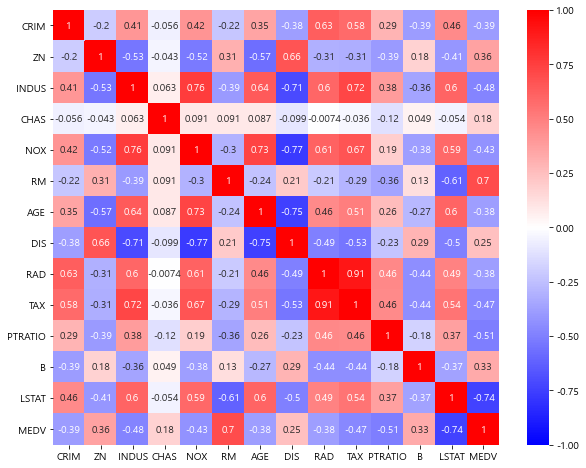

In [157]:
import seaborn as sns

plt.figure(figsize = (10, 8))
sns.heatmap(boston_df.corr(), annot = True, vmin = -1, vmax = 1, cmap = 'bwr')
plt.show()

In [158]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Factor']= [ variance_inflation_factor(boston_df.values, i )  for i in range( boston_df.shape[1] ) ]
vif['features'] = boston_df.columns
vif


,VIF Factor,features
0,2.131404,CRIM
1,2.910004,ZN
2,14.485874,INDUS
3,1.176266,CHAS
4,74.004269,NOX
5,136.101743,RM
6,21.398863,AGE
7,15.430455,DIS
8,15.369980,RAD
9,61.939713,TAX


In [159]:
# 특성데이터가 많은 경우 : 다중공선성(컬럼제거), 타겟에 상관관계가 낮은 컬럼
from sklearn.datasets import fetch_california_housing

In [160]:
cal = fetch_california_housing()
cal

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [161]:
cal['data'].shape

(20640, 8)

### 캘리포니아 주택 가격 데이터

| 속성 | 설명 |
|------|------|
| MedInc | 블록의 중간 소득 |
| HouseAge | 블록의 중간 주택 연도 |
| AveRooms | 자치시(town)별 비소매 상업지역 토지 비율 |
| AveBedrms | 찰스 강(Charles River)에 대한 변수 (강의 경계에 위치하면 1, 그렇지 않으면 0) |
| Population | 10,000,000당  일산화질소 농도 |
| AveOccup | 주택 1가구당 평균 방의 수 |
| Latitude | 1940년 이전에 건축된 소유주택 비율 |
| Longitude | 5개의 보스턴 고용 센터까지의 가중 거리 |


### 캘리포니아 주택가격을 이용하여   crossvalidation 값을 구하시요.

### 다중공선성을 확인한후에 다중공선성이 높은 컬럼을 제외하고 학습하여 crossvalidation값을 확인하시요


In [174]:
cal_df = pd.DataFrame(cal['data'])
cal_df.columns = cal['feature_names']
cal_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [175]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Factor']= [ variance_inflation_factor(cal_df.values, i )  for i in range(cal_df.shape[1]) ]
vif['features'] = cal_df.columns
vif

,VIF Factor,features
0,11.511140,MedInc
1,7.195917,HouseAge
2,45.993601,AveRooms
3,43.590314,AveBedrms
4,2.935745,Population
5,1.095243,AveOccup
6,559.874071,Latitude
7,633.711654,Longitude


In [176]:
# longitude 제외
cal_df_1 = cal_df.drop(['Longitude'], axis = 1)

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Factor']= [ variance_inflation_factor(cal_df_1.values, i )  for i in range(cal_df_1.shape[1]) ]
vif['features'] = cal_df_1.columns
vif

,VIF Factor,features
0,9.865861,MedInc
1,6.880512,HouseAge
2,42.192223,AveRooms
3,39.768396,AveBedrms
4,2.793169,Population
5,1.094908,AveOccup
6,22.498755,Latitude


In [177]:
# AveRooms 제외
cal_df_2 = cal_df_1.drop(['AveRooms'], axis = 1)

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Factor']= [ variance_inflation_factor(cal_df_2.values, i )  for i in range(cal_df_2.shape[1]) ]
vif['features'] = cal_df_2.columns
vif

,VIF Factor,features
0,5.036342,MedInc
1,6.660725,HouseAge
2,6.430073,AveBedrms
3,2.752356,Population
4,1.094801,AveOccup
5,21.922515,Latitude


In [178]:
# Latitude 제외
cal_df_3 = cal_df_2.drop(['Latitude'], axis = 1)

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Factor']= [ variance_inflation_factor(cal_df_3.values, i )  for i in range(cal_df_3.shape[1]) ]
vif['features'] = cal_df_3.columns
vif

,VIF Factor,features
0,3.801038,MedInc
1,3.769898,HouseAge
2,4.263506,AveBedrms
3,2.222516,Population
4,1.094644,AveOccup


In [226]:
x_data = cal_df_3.drop(['MedInc'], axis = 1)
y_data = cal_df[['MedInc']]
model = make_pipeline(StandardScaler(), SGDRegressor())     # StandardScaler() 한 후, SGDRegressor() 진행한다 (순서 중요)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state = 1)
model.fit(x_train, y_train)

r2scores = cross_val_score(model, x_data, y_data, cv = 5, scoring = 'r2', verbose=1)
print(r2scores)
print(r2scores.mean())

[-2.38463227e+02 -1.97605410e-02 -8.17087250e-02 -2.40386530e+00
 -1.71056330e-01]
-48.22792356920722


C:\Users\medici\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\medici\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\medici\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\medici\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

### 1. trees.csv를 읽어들여서 아래에 대해

1) 상관관계, 다중공선성을 확인하시요

2) crossvalidation score 를 구하시요.

3) 아래의 데이터를 이용하여 Volume을 예측하시요

Girth 8.8, 10.5
Height 63, 72

### 2. volume이 40 이상이면 크다

30이상이면 보통 미만이면 적음으로

아래와 같이 출력하시요

volume  정도
============
 10.3    적음
...

### 3. Height  가 가장 작은값과 큰값을 구하시요

### 4. girth(테두리) 가 가장큰 top5를 구하시요(girth, height, volume)


In [230]:
tree = pd.read_csv('data/trees.csv')
tree

,Girth,Height,Volume
0,8.3,70,10.3
1,8.6,65,10.3
2,8.8,63,10.2
3,10.5,72,16.4
4,10.7,81,18.8
5,10.8,83,19.7
6,11.0,66,15.6
7,11.0,75,18.2
8,11.1,80,22.6
9,11.2,75,19.9


<AxesSubplot:>

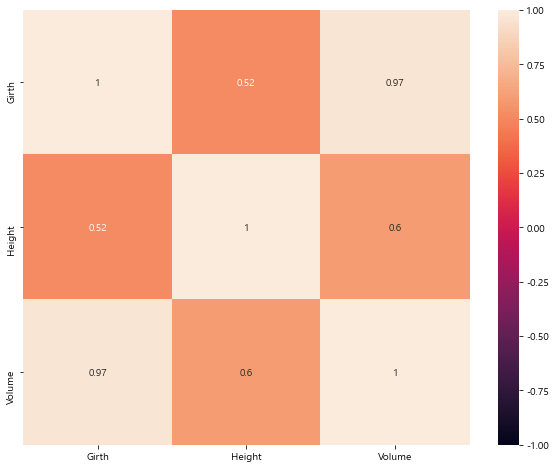

In [235]:
import seaborn as sns

plt.figure(figsize = (10, 8))
sns.heatmap(tree.corr(), annot = True, vmin = -1, vmax = 1)

In [229]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Factor']= [ variance_inflation_factor(tree.values, i )  for i in range(tree.shape[1]) ]
vif['features'] = tree.columns
vif

,VIF Factor,features
0,158.198657,Girth
1,62.939266,Height
2,32.993875,Volume


In [236]:
x_data = tree.drop(['Volume'], axis = 1)
y_data = tree[['Volume']]
model = make_pipeline(StandardScaler(), SGDRegressor())     # StandardScaler() 한 후, SGDRegressor() 진행한다 (순서 중요)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state = 1)
model.fit(x_train, y_train)

r2scores = cross_val_score(model, x_data, y_data, cv = 5, scoring = 'r2', verbose=1)
print(r2scores)
print(r2scores.mean())

[-2.5117247   0.67094132 -0.16184103  0.5382102  -0.67938551]
-0.4287599452652815


C:\Users\medici\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\medici\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\medici\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\medici\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

In [237]:
model.predict([[8.8, 63], [10.5, 72]])

array([ 5.61363333, 16.28720904])

In [244]:
for i in range(len(tree)) :
    if tree['Volume'][i] >= 40 :
        tree['정도'][i] = '크다'
    elif tree['Volume'][i] >= 30 :
        tree['정도'][i] = '보통'
    else :
        tree['정도'][i] = '적음'

tree

<ipython-input-244-f958d2afb911>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tree['정도'][i] = '적음'
<ipython-input-244-f958d2afb911>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tree['정도'][i] = '보통'
<ipython-input-244-f958d2afb911>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tree['정도'][i] = '크다'


,Girth,Height,Volume,정도
0,8.3,70,10.3,적음
1,8.6,65,10.3,적음
2,8.8,63,10.2,적음
3,10.5,72,16.4,적음
4,10.7,81,18.8,적음
5,10.8,83,19.7,적음
6,11.0,66,15.6,적음
7,11.0,75,18.2,적음
8,11.1,80,22.6,적음
9,11.2,75,19.9,적음


In [246]:
print('min : ', tree['Height'].min(), ', max : ', tree['Height'].max())


min :  63 , max :  87


In [248]:
tree.sort_values('Girth', ascending=False).head()

,Girth,Height,Volume,정도
30,20.6,87,77.0,크다
29,18.0,80,51.0,크다
28,18.0,80,51.5,크다
27,17.9,80,58.3,크다
26,17.5,82,55.7,크다


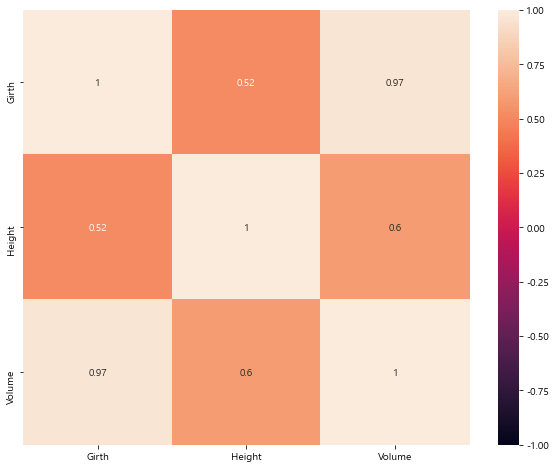

[-2.51861706  0.67502596 -0.16195453  0.53572504 -0.67429519]
-0.42882315446712715
min :  63 , max :  87


C:\Users\medici\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\medici\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\medici\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\medici\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

,Girth,Height,Volume,정도
30,20.6,87,77.0,크다
29,18.0,80,51.0,크다
28,18.0,80,51.5,크다
27,17.9,80,58.3,크다
26,17.5,82,55.7,크다


In [250]:
tree = pd.read_csv('data/trees.csv')

# 1. 1) 상관관계
import seaborn as sns

plt.figure(figsize = (10, 8))
sns.heatmap(tree.corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

# 1) 다중공선성
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Factor']= [ variance_inflation_factor(tree.values, i )  for i in range(tree.shape[1]) ]
vif['features'] = tree.columns
vif

# 2) crossvalidation score
from sklearn.linear_model import LinearRegression, SGDRegressor 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import make_pipeline
x_data = tree.drop(['Volume'], axis = 1)
y_data = tree[['Volume']]
model = make_pipeline(StandardScaler(), SGDRegressor())     # StandardScaler() 한 후, SGDRegressor() 진행한다 (순서 중요)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state = 1)
model.fit(x_train, y_train)

r2scores = cross_val_score(model, x_data, y_data, cv = 5, scoring = 'r2', verbose=1)
print(r2scores)
print(r2scores.mean())

# 3) Volume 예측
model.predict([[8.8, 63], [10.5, 72]])

# 2.
tree['정도'] = tree['Volume']

for i in range(len(tree)) :
    if tree['Volume'][i] >= 40 :
        tree['정도'][i] = '크다'
    elif tree['Volume'][i] >= 30 :
        tree['정도'][i] = '보통'
    else :
        tree['정도'][i] = '적음'

# 3.
print('min : ', tree['Height'].min(), ', max : ', tree['Height'].max())

# 4.
tree.sort_values('Girth', ascending=False).head()